# Angular distribution of $b$-quarks produced in $Z^0$ decays

Here we look at the $\cos(\theta)$ distribution of $b$-quarks produced in $Z^0 \to b\bar{b}$ events; $\theta$ is the angle between the particle direction and the beam axis. Theoretically, the distribution of $b$-quarks produced in $Z^0$ decays should follow a $1 + \cos^2(\theta)$ distribution.

In [46]:
import sys,os
import uproot4 as uproot
import awkward1 as ak
import json
import numpy as np
import matplotlib.pyplot as plt
from fcc_python_tools.locations import loc
from fcc_python_tools import kinematics
from particle import literals as lp
from fcc_python_tools import plotting

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Roman']})
rc('text', usetex=True)

file = uproot.open("/eos/experiment/fcc/ee/tmp/test.root")
tree = file['events']

Get the $b$-quarks from the generated particles and calculate the $\theta$ angle. This method internally calculates $\eta$ using the three-momentum, and then does $\theta = 2\arctan{e^{-\eta}}$

In [52]:
g_container = "Particle"
g = tree.arrays(filter_name=f"{g_container}*",how="zip")

g[g_container,"theta"] = kinematics.calc_theta(g,g_container)
g[g_container,"costheta"] = np.cos(g[g_container,"theta"])
g[g_container,"eta"] = kinematics.calc_eta(g,g_container)

g_ID_cut = abs(g[g_container,'PDG']) == 5
g = g[g_container][g_ID_cut]

Plot the distribution:

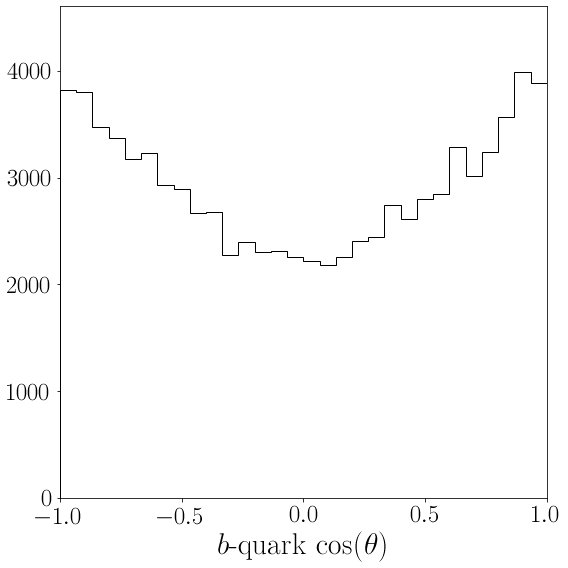

In [53]:
bins = 30
plotting.hist_plot(ak.flatten(g["costheta"]),"b_quark_costheta","$b$-quark $\\cos(\\theta)$",-1,1,bins)

We find that the distribution follows the expected $1 + \cos^2(\theta)$ distribution for $Z^0 \to b \bar{b}$.

Here is the $\eta$ distribution:

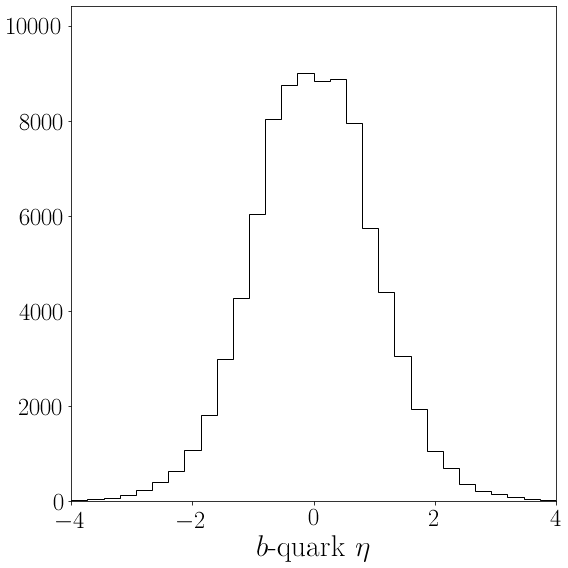

In [54]:
plotting.hist_plot(ak.flatten(g["eta"]),"b_quark_eta","$b$-quark $\eta$",-4,4,bins)

Let's look at the relationship between $\cos(\theta)$ and $\eta$:

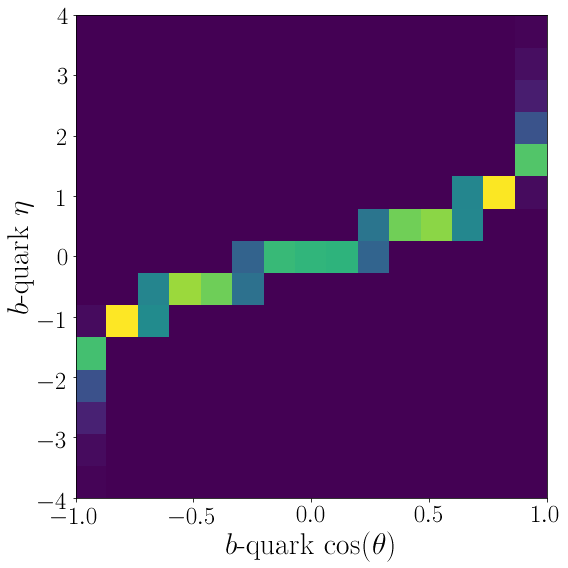

In [55]:
plotting.hist_plot_2d(ak.flatten(g["costheta"]),
                      "b_quark_costheta",
                      "$b$-quark $\\cos(\\theta)$",
                      ak.flatten(g["eta"]),
                      "b_quark_eta",
                      "$b$-quark $\\eta$",
                      -1.,
                      1.,
                      -4.,
                      4,
                      15,
                      15,
                      False)

## Distribution for quarks inside the $|\eta| < 3$ region

We can compare the $\cos(\theta)$ distribution for the $|\eta| < 3$ region, which corresponds to the detector acceptance cut applied in the Delphes simulation.

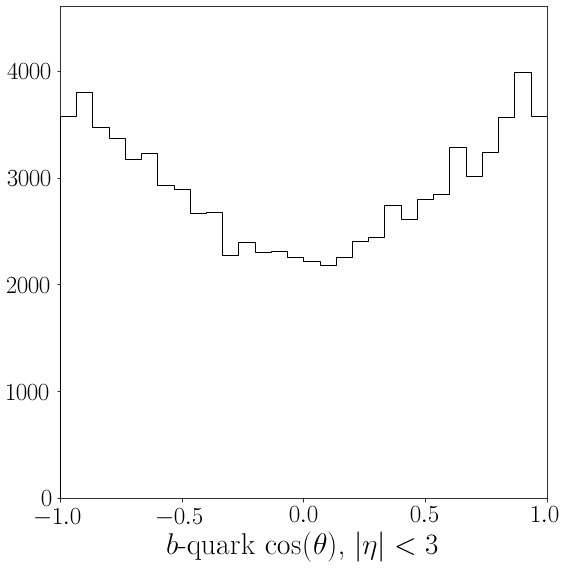

In [56]:
g_eta_cut = abs(g["eta"]) < 3
g_cut = g[g_eta_cut]
plotting.hist_plot(ak.flatten(g_cut["costheta"]),
                   "b_quark_costheta_eta_cut",
                   "$b$-quark $\\cos(\\theta)$, $|\eta| < 3$",
                   -1,
                   1,
                   bins)

Indeed we find that the $|\eta| < 3$ cut introduces acceptance effects at the edges of the $\cos(\theta)$ distribution.

## Difference between $b$ and $\bar{b}$ quarks due to parity violation in the $Z^0$ couplings

It is interesting to look at the angular distribution for $b$ and $\bar{b}$ quarks separately. The distributions should be asymmetric, following a $1 + A_{FB}\cos(\theta) + \cos^2(\theta)$ trend. Here, $A_{FB}$ is the forward-backward asymmetry which is caused by parity violation in the $Z^0$ couplings and can be related to $\sin^2(\theta_W)$. 

In [57]:
b = g[g['PDG'] == 5]
bbar = g[g['PDG'] == -5]

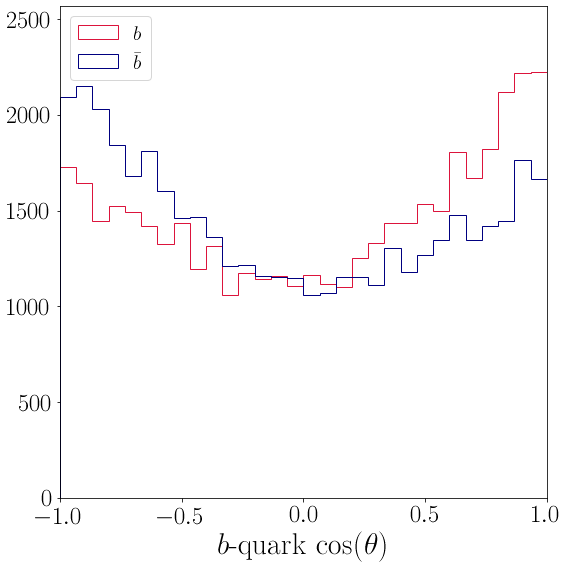

In [58]:
low = -1.
high = 1.
fig, ax = plt.subplots(figsize=(8,8))
plt.hist(ak.flatten(b["costheta"]),bins=bins,range=(low,high),histtype='step',color='crimson',label="$b$")
plt.hist(ak.flatten(bbar["costheta"]),bins=bins,range=(low,high),histtype='step',color='navy',label="$\\bar{b}$")
plt.xlabel("$b$-quark $\cos(\\theta)$",fontsize=30)
plt.xlim(low,high)
ax.tick_params(axis='both', which='major', labelsize=25)
plt.legend(fontsize=20,loc='upper left')
ymin, ymax = plt.ylim()
plt.ylim(0.,ymax*1.1)
plt.tight_layout()
plt.show()
fig.savefig(f"{loc.PLOTS}/b_bbar_costheta.pdf")